Epoch 1/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 0.0172 
Epoch 2/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.0142
Epoch 3/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.0137
Epoch 4/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.0138
Epoch 5/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.0132
Epoch 6/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.0133
Epoch 7/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.0121
Epoch 8/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0110
Epoch 9/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.0091
Epoch 10/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.0092
Epoch 11/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0075
Epoch 12/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.0063
Epoch 13/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.0060
Epoch 14/5000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.0061
Epoch 15/5000
40/40 ━━━━━━━━

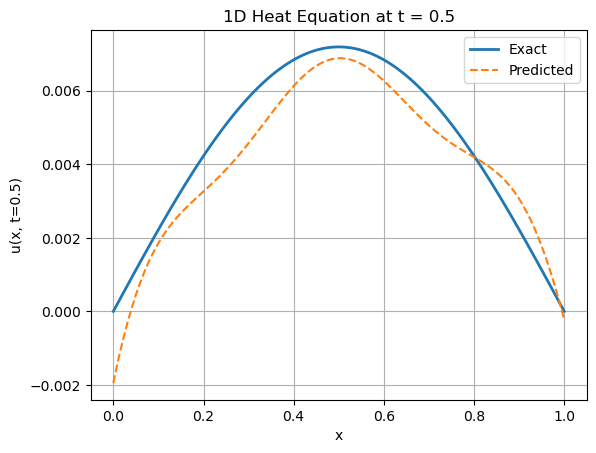

In [1]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Analytical solution
def heat_solution(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

# Generate training data
N = 5000
x = np.random.rand(N, 1)         # x in [0, 1]
t = np.random.rand(N, 1)         # t in [0, 1]
X_train = np.hstack((x, t))
y_train = heat_solution(x, t)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),              # inputs: x and t
    tf.keras.layers.Dense(64, activation='tanh'),   # Hidden Layer
    tf.keras.layers.Dense(64, activation='tanh'),   # Hidden Layer
    tf.keras.layers.Dense(1)                        # output: u(x, t)
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
# Batch size indicates how many iterations it will then update the parameters. The smaller number, the more accurate but inefficient. 
model.fit(X_train, y_train, epochs=5000, batch_size=128, verbose=1)

# Generate test data
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
t_test = np.full_like(x_test, 0.5)             # fixed time t=0.5
X_test = np.hstack((x_test, t_test))
y_pred = model.predict(X_test)
y_exact = heat_solution(x_test, t_test)

# Plot comparison
plt.plot(x_test, y_exact, label='Exact', linewidth=2)
plt.plot(x_test, y_pred, '--', label='Predicted')
plt.xlabel('x')
plt.ylabel('u(x, t=0.5)')
plt.title('1D Heat Equation at t = 0.5')
plt.legend()
plt.grid(True)
plt.show()
